In [1]:
from __future__ import print_function
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import gridspec
import pandas as pd
from glob import glob
import seaborn as sns
sns.set_style('ticks')
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=14
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
%matplotlib inline

In [2]:
data_aod = xr.open_dataset('aCAVA_full_zonal_mean_aod.nc',decode_times=False)
data_aod['time'] = np.arange(144)
data_O3 = xr.open_dataset('aCAVA_full_zonal_mean_colo3.nc',decode_times=False)

In [3]:
o3 = data_O3['totO3']

In [4]:
aod = data_aod['AEROD_v']

In [5]:
for la in 

SyntaxError: invalid syntax (<ipython-input-5-8d9de2fe6c82>, line 1)

In [5]:
round(float(o3.lat[1].values),2)

-88.11

In [6]:
lat = o3.lat.round(2)
month = np.arange(1,13)
time = o3.time

In [ ]:
#lat = lat[:2]
#time = time[7:12]
year = 1
month = 0
for t in time:
    month += 1
    if t == 0:
        year = 1
    elif t%12 == 0:
        year += 1
        month = 0
    for la in lat:
        o3col = o3.sel(time=t,lat=la,method='nearest').round(3).values
        tauaer = aod.sel(time=t,lat=la,method='nearest').round(3).values
        with open('V5.3.1/INPUTS/template','rt') as fin:
            with open('V5.3.1/INPUTS/usrinp','wt',1) as fout:
                for line in fin:
                    (fout.write(line.replace('lat =          0.000','lat =          {}'.format(la.values))
                                .replace('o3col =      300.000','o3col =      {}'.format(o3col))
                                .replace('tauaer =       0.235','tauaer =       {}'.format(tauaer))
                                .replace('imonth =           3','imonth =           {}'.format(month))))
        !cd V5.3.1/ ; ./tuv > logfile
        outt = str(month)
        outla = str(la.values)
        outyear = str(year)
        outfile = 'out_{}_{}_{}'.format(outyear,outt,outla)
        !cp usrout.txt $outfile

In [9]:
!cd V5.3.1/ ; ./tuv




 done: loading inputs
 calculating....
 equally spaced z-grid
step =    1 sza =    77.522 Earth-sun factor =  1.0220923
step =    2 sza =    77.451 Earth-sun factor =  1.0220780
step =    3 sza =    77.452 Earth-sun factor =  1.0220639
step =    4 sza =    77.526 Earth-sun factor =  1.0220495
step =    5 sza =    77.671 Earth-sun factor =  1.0220352
    0.9922     0.9203     0.4925 Generic DOM absorption                            


In [28]:
o3.round(3)


<xarray.DataArray 'totO3' (time: 144, lat: 96)>
array([[316.292, 316.235, 316.256, ..., 360.982, 359.047, 358.341],
       [295.731, 296.275, 296.997, ..., 395.989, 394.238, 393.577],
       [282.977, 283.754, 285.257, ..., 416.916, 415.586, 414.937],
       ...,
       [275.27 , 276.266, 278.9  , ..., 263.089, 262.215, 261.807],
       [310.159, 310.894, 312.412, ..., 294.563, 294.018, 293.741],
       [334.905, 335.284, 335.579, ..., 363.624, 364.059, 364.192]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 -78.63 ...

In [ ]:
time

In [8]:
table1 = pd.read_table('out_006_065.37',sep='\s\s+',header=156,skipfooter=1,index_col='time, hrs.')

/home/hanbre/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


IOError: [Errno 2] No such file or directory: 'out_006_065.37'

In [55]:
table1.loc[12]['6']

6.271

In [56]:
table1

,"sza, deg.",1,2,3,4,5,6,7
"time, hrs.",,,,,,,,
11.0,46.125,1.099,40.04,0.2426,0.3155,0.003098,5.916,0.2869
11.5,45.222,1.141,40.90,0.2489,0.3283,0.003277,6.166,0.3000
12.0,44.843,1.159,41.26,0.2516,0.3338,0.003353,6.271,0.3055
12.5,45.005,1.151,41.11,0.2505,0.3315,0.003320,6.226,0.3031
13.0,45.701,1.119,40.44,0.2456,0.3215,0.003182,6.034,0.2930


In [7]:
ds = xr.DataArray(np.zeros([144,96]),coords=(time,lat),dims=('time','lat'))
dnad = xr.DataArray(np.zeros([144,96]),coords=(time,lat),dims=('time','lat'))

In [8]:
ds[:] = np.nan
dnad[:] = np.nan

In [10]:
ds

<xarray.DataArray (time: 144, lat: 96)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 -82.42 -80.53 -78.63 ...

In [11]:
'{0:02d}'.format(1)

'01'

In [12]:
'{0:03d}'.format(1)

'001'

In [9]:
list_of_files = glob('aCAVA_full_TUV/out_*')

In [10]:
counter = 0
for f in list_of_files:
    #print(f)
    if counter % 100 == 0:
        print(counter)
    components = f.split('_')
    t = int(components[3])
    la = float(components[4])
    table = pd.read_table(f,sep='\s\s+',header=156,skipfooter=1,index_col='time, hrs.')
    UVI_noon = table.loc[12]['6']
    dnad_noon = table.loc[12]['5']
    ds.loc[t,la] = UVI_noon
    dnad.loc[t,la] = dnad_noon
    counter += 1

0


/home/hanbre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800


In [16]:
test = 'out_006_065.37'

In [17]:
a=test.split('_')

In [ ]:
la=float(a[2])

In [ ]:
t = int(a[1])

In [73]:
ds.loc[t,la]

<xarray.DataArray ()>
array(3.)
Coordinates:
    time     int64 6
    lat      float64 65.37

In [79]:
ds.loc[103,74.84]

<xarray.DataArray ()>
array(1.865)
Coordinates:
    time     int64 103
    lat      float64 74.84

In [81]:
t

0

In [82]:
f

'out2'

In [18]:
test=np.isnan(ds)

In [19]:
test.where(test==True,drop=True)

/home/hanbre/anaconda2/lib/python2.7/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):
/home/hanbre/anaconda2/lib/python2.7/site-packages/xarray/core/dtypes.py:25: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  elif np.issubdtype(dtype, int):
/home/hanbre/anaconda2/lib/python2.7/site-packages/xarray/core/dtypes.py:29: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif np.issubdtype(dtype, complex):


<xarray.DataArray (time: 0, lat: 0)>
array([], shape=(0, 0), dtype=float64)
Coordinates:
  * time     (time) int64 
  * lat      (lat) float64 

/home/hanbre/anaconda2/lib/python2.7/site-packages/xarray/plot/utils.py:51: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  converter.register()


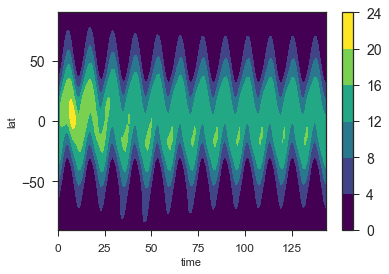

In [20]:
ds.plot.contourf(x='time',y='lat',vmin=0,vmax=24)

In [21]:
para_UVI = xr.open_dataset('aCAVA_full_zonal_mean_para_UVI.nc')

In [22]:
pUVI = para_UVI['UVI']

In [23]:
plt.contourf((pUVI.values - ds.values).transpose(),cmap = cmap)
plt.colorbar()

NameError: name 'cmap' is not defined

In [11]:
ctr = xr.DataArray(np.zeros([12,96]),coords=(time[0:12],lat),dims=('time','lat'))
ctr_dnad = xr.DataArray(np.zeros([12,96]),coords=(time[0:12],lat),dims=('time','lat'))
ctr[:] = np.nan
ctr_dnad[:] = np.nan

In [12]:
list_of_files_cont = glob('control/out_*')

In [13]:
counter = 0
for f in list_of_files_cont:
    #print(f)
    if counter % 100 == 0:
        print(counter)
    components = f.split('_')
    t = int(components[1])
    la = float(components[2])
    table = pd.read_table(f,sep='\s\s+',header=156,skipfooter=1,index_col='time, hrs.')
    UVI_noon_ctr = table.loc[12]['6']
    dnad_noon_ctr = table.loc[12]['5']
    ctr.loc[t,la] = UVI_noon_ctr
    ctr_dnad.loc[t,la] = dnad_noon_ctr
    counter += 1

0


/home/hanbre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


100
200
300
400
500
600
700
800
900
1000
1100


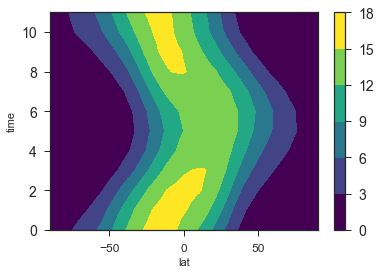

In [27]:
ctr.plot.contourf()

In [17]:
ctr_12 = xr.concat([ctr,ctr,ctr,ctr,ctr,ctr,ctr,ctr,ctr,ctr,ctr,ctr],dim='time')
ctr_12['time'] = np.arange(144)
ctr_dnad_12 = xr.concat([ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,ctr_dnad,],dim='time')
ctr_dnad_12['time']=np.arange(144)

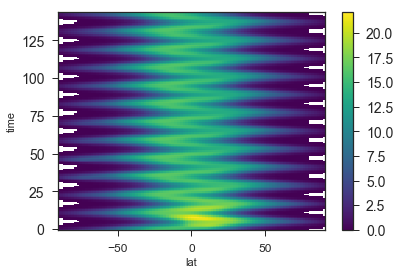

In [29]:
ds.where(ds>0).plot()

In [18]:
anom_UVI = ds-ctr_12
anom_UVI.max()

<xarray.DataArray ()>
array(7.33)

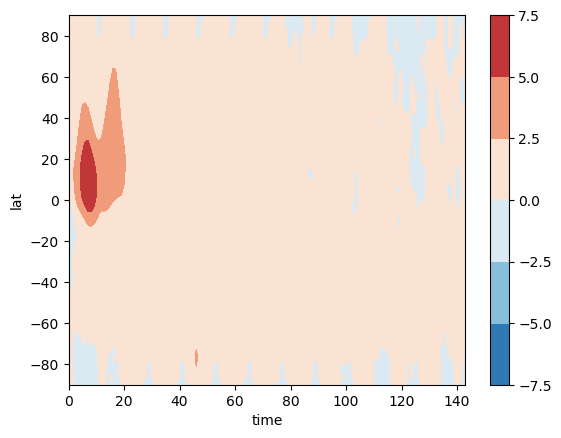

In [76]:
(ds-ctr_12).plot.contourf(x='time',y='lat')#,vmin=-0.01,vmax=9,levels=10)

In [154]:
components

['aCAVA', 'full', 'TUV/out', '000', '000.95']

In [14]:
cmap = sns.diverging_palette(220, 20,as_cmap=True)
norm = MidpointNormalize(midpoint=0)

TypeError: object of type 'int' has no len()

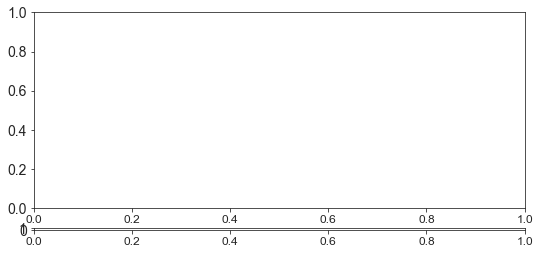

In [19]:
fig = plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(2, 2, height_ratios=[100, 1],width_ratios=[30,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2]) #Subplot to hold secondary x-axis
CF = anom_UVI.plot.contourf(x='time',y='lat',levels=17,vmin=0,vmax=8.0,cmap=cmap,norm=norm,ax=ax1,add_labels=False,add_colorbar=False)
text = ['Ja','A','Ju','O']
locs = np.arange(0,144,3)
labels = 12*text
ax1.set_xticks(locs)
ax1.set_xticklabels(labels)
ax1.set_ylim(-90,90)
ax1.set_yticks(np.arange(-90,91,30))
ax1.set_ylabel('Latitude',fontsize=14)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlim(0,143)
ax2.set_xticks(np.arange(0,144,12))#[0,1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,''],fontsize=14)
ax2.set_xlabel('Years since eruption. Key: Ja=January, A=April, Ju=July,O=October',fontsize=12)
ax3 = fig.add_subplot(gs[1])#fig_tl.add_axes([0.82, 0.195, 0.015, 0.69])#Axes to hold colorbar
clb = fig.colorbar(CF, cax=ax3)
clb.ax.tick_params(labelsize=10)
clb.set_label('Change in UV Index',labelpad=15)
ax1.set_title('Change in noon UV index',fontsize=16)
fig.text(0.02,0.9,'b',transform=ax1.transAxes,fontsize=16,weight='bold',fontname='arial')
plt.tight_layout(w_pad=0.1)
#fig.savefig('/home/hanbre/nird/BCKUP_after_21.07.15/aCAVA_experiment/fig9/TUV_full_UVI_tl.png',bbox_inches='tight',dpi=300)

In [20]:
dnad_weighted_uv_change=(((dnad/ctr_dnad_12)-1)*100)
print(dnad_weighted_uv_change.min())
dnad_weighted_uv_change.plot.contourf(x='time',vmin=0,vmax=400,levels=21,cmap=cmap,norm=norm)

<xarray.DataArray ()>
array(-9.537434)


ValueError: Cannot supply vmax and a norm with a different vmax.

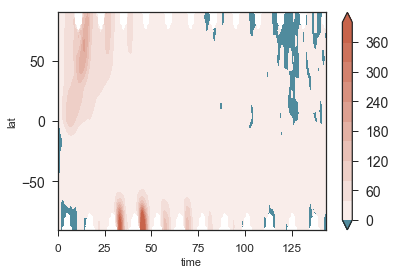

In [33]:
clevels = np.linspace(0,400,21)
dnad_weighted_uv_change.plot.contourf(x='time',levels=clevels,cmap=cmap,norm=norm)

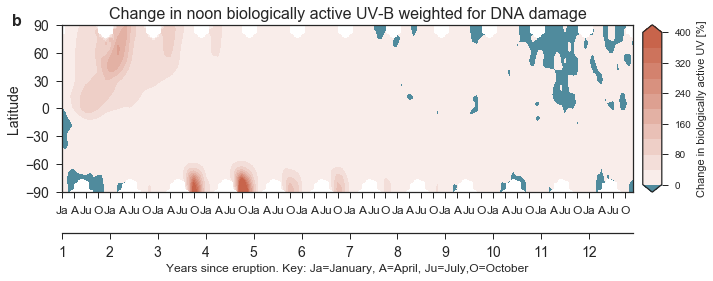

In [51]:
fig = plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(2, 2, height_ratios=[100, 1],width_ratios=[30,1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[2]) #Subplot to hold secondary x-axis
CF=dnad_weighted_uv_change.plot.contourf(x='time',levels=clevels,cmap=cmap,norm=norm,ax=ax1,add_labels=False,add_colorbar=False)
text = ['Ja','A','Ju','O']
locs = np.arange(0,144,3)
labels = 12*text
ax1.set_xticks(locs)
ax1.set_xticklabels(labels)
ax1.set_ylim(-90,90)
ax1.set_yticks(np.arange(-90,91,30))
ax1.set_ylabel('Latitude',fontsize=14)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xlim(0,143)
ax2.set_xticks(np.arange(0,144,12))#[0,1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,''],fontsize=14)
ax2.set_xlabel('Years since eruption. Key: Ja=January, A=April, Ju=July,O=October',fontsize=12)
ax3 = fig.add_subplot(gs[1])#fig_tl.add_axes([0.82, 0.195, 0.015, 0.69])#Axes to hold colorbar
clb = fig.colorbar(CF, cax=ax3)
clb.ax.tick_params(labelsize=10)
tick_locator = matplotlib.ticker.MaxNLocator(nbins=5)
clb.locator = tick_locator
clb.update_ticks()
clb.set_label('Change in biologically active UV [%]',labelpad=5)
ax1.set_title('Change in noon biologically active UV-B weighted for DNA damage',fontsize=16)
fig.text(0.02,0.9,'b',transform=ax1.transAxes,fontsize=16,weight='bold',fontname='arial')
plt.tight_layout(w_pad=0.1)
fig.savefig('TUV_full_dnadUV_tl.png',bbox_inches='tight',dpi=300)

In [66]:
clevels = np.linspace(0,400,21)
clevels

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320., 340., 360., 380., 400.])

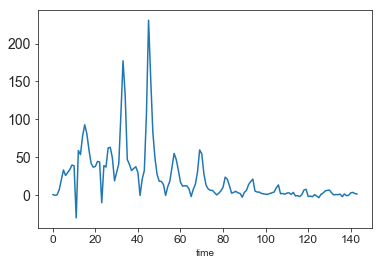

In [26]:
dnad_weighted_uv_change.sel(lat=slice(-75,75)).reduce(np.average,weights=np.cos(dnad_weighted_uv_change.lat.sel(lat=slice(-75,75))),dim='lat').plot()

In [30]:
data_aod

<xarray.Dataset>
Dimensions:  (lat: 96, time: 144)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 136 137 138 139 140 141 142 143
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Data variables:
    AEROD_v  (time, lat) float64 ...